# Training

### Downloading data and show computer infrastructure

In [1]:
# Rather than downloading the data on local machine, the data was downloaded directly from keras's dataset.
# Import necessary package
!nvidia-smi
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
keras.backend.clear_session()
np.random.seed(5318)
tf.random.set_seed(5318)
from keras.datasets import cifar100
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

Sun Oct 24 02:44:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Data pre-processing

In [3]:
# Import all necessary package to process the data
import os
import numpy as np
from keras import backend
from keras.datasets.cifar import load_batch
from keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import keras_export

# Assigning train and test data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()



In [4]:
# Double checking if the size of data match
print(x_train.shape)
_, height, width, _ = x_train.shape
print(height, width)

(50000, 32, 32, 3)
32 32


In [5]:
# Normalizing the x value in both train and test
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

### Image Augmentation

In [6]:
# Importing image data generator package
from keras.preprocessing.image import ImageDataGenerator
# Setting parameter of how the new image could be generated
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )
# Generate new data with generated images
datagen.fit(x_train)

### CNN Layers

In [7]:
# Creating CNN layers
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(input_shape=(height, width, 3),filters=128,kernel_size=(3,3),
                              padding="same", activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(3,3),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(keras.layers.BatchNormalization())

# Fully Connected Network
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512,activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=256,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=100, activation="softmax"))

2021-10-24 02:44:34.135606: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 02:44:34.224136: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 02:44:34.224875: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-24 02:44:34.226010: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
# Setting up optimizers for gradient descent, Adam was used
opt = keras.optimizers.Adam(learning_rate=5e-3)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [10]:
# Converting the label into 32 bits integer for easier manipulation
y_train_k = keras.utils.to_categorical(y_train, 100).astype('int32')
y_test_k = keras.utils.to_categorical(y_test, 100).astype('int32')

### Training the model

In [11]:
# Train with image augmentation
history2=model.fit_generator(datagen.flow(x_train, y_train_k, batch_size=256),
                    steps_per_epoch = len(x_train)/256, epochs=500, validation_data=(x_test, y_test_k))

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-10-24 02:44:37.585197: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500


2021-10-24 02:44:39.978450: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


195/195 [==============================] - 33s 127ms/step - loss: 3.9190 - accuracy: 0.1056 - val_loss: 3.9176 - val_accuracy: 0.1251
Epoch 2/500
195/195 [==============================] - 25s 126ms/step - loss: 3.2856 - accuracy: 0.1971 - val_loss: 3.1939 - val_accuracy: 0.2299
Epoch 3/500
195/195 [==============================] - 24s 123ms/step - loss: 2.9912 - accuracy: 0.2477 - val_loss: 2.8340 - val_accuracy: 0.3011
Epoch 4/500
195/195 [==============================] - 25s 128ms/step - loss: 2.7890 - accuracy: 0.2873 - val_loss: 2.6612 - val_accuracy: 0.3230
Epoch 5/500
195/195 [==============================] - 24s 124ms/step - loss: 2.6549 - accuracy: 0.3163 - val_loss: 2.3915 - val_accuracy: 0.3706
Epoch 6/500
195/195 [==============================] - 24s 124ms/step - loss: 2.5465 - accuracy: 0.3367 - val_loss: 2.3512 - val_accuracy: 0.3859
Epoch 7/500
195/195 [==============================] - 25s 127ms/step - loss: 2.4634 - accuracy: 0.3565 - val_loss: 2.2319 - val_accurac

### Saving model

In [12]:
model.save("group84_pretrained_model.h5")

# Validation

### Importing data again

In [1]:
# Importing data again to prevent any confusion 
# Becasue Image Augmentation was used, to be on the safer side, a new data set was downloaded

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
keras.backend.clear_session()
np.random.seed(5318)
tf.random.set_seed(5318)
from keras.datasets import cifar100
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [2]:
# Data pre-processed
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(x_train.shape)
_, height, width, _ = x_train.shape
print(height, width)
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std
print(y_train.shape)

(50000, 32, 32, 3)
32 32
(50000, 1)


In [3]:
# Setting up layers
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(input_shape=(height, width, 3),filters=128,kernel_size=(3,3),
                              padding="same", activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(3,3),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(keras.layers.BatchNormalization())



model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512,activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=256,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=100, activation="softmax"))

### Loading model

In [4]:
model.load_weights('group84_pretrained_model.h5')

### Double checking if the data are in right shape

In [5]:
print(x_test.shape)
y_pred = model.predict(x_test)
y_test_k = keras.utils.to_categorical(y_test, 100).astype('int32')
print(y_test_k)

(10000, 32, 32, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Outputing validation metrics

In [24]:
# Metric package from sklearn was used
import sklearn.metrics as metrics
label_pred = np.argmax(y_pred, axis = -1)
label_test = np.argmax(y_test_k, axis = -1)
accuracy = metrics.accuracy_score(label_test, label_pred)
print("The accuracy was: {}%".format(accuracy*100))
print("")

print("")
report = metrics.classification_report(label_test, label_pred,
                                   output_dict=True)
print(report)

The accuracy was: 60.47%


{'0': {'precision': 0.9, 'recall': 0.81, 'f1-score': 0.8526315789473685, 'support': 100}, '1': {'precision': 0.6864406779661016, 'recall': 0.81, 'f1-score': 0.743119266055046, 'support': 100}, '2': {'precision': 0.6125, 'recall': 0.49, 'f1-score': 0.5444444444444445, 'support': 100}, '3': {'precision': 0.5, 'recall': 0.2, 'f1-score': 0.28571428571428575, 'support': 100}, '4': {'precision': 0.3114754098360656, 'recall': 0.38, 'f1-score': 0.34234234234234234, 'support': 100}, '5': {'precision': 0.6626506024096386, 'recall': 0.55, 'f1-score': 0.6010928961748634, 'support': 100}, '6': {'precision': 0.6379310344827587, 'recall': 0.74, 'f1-score': 0.6851851851851852, 'support': 100}, '7': {'precision': 0.6, 'recall': 0.6, 'f1-score': 0.6, 'support': 100}, '8': {'precision': 0.7604166666666666, 'recall': 0.73, 'f1-score': 0.7448979591836735, 'support': 100}, '9': {'precision': 0.8026315789473685, 'recall': 0.61, 'f1-score': 0.6931818181818182, 'support': 100}, '10':

<AxesSubplot:>

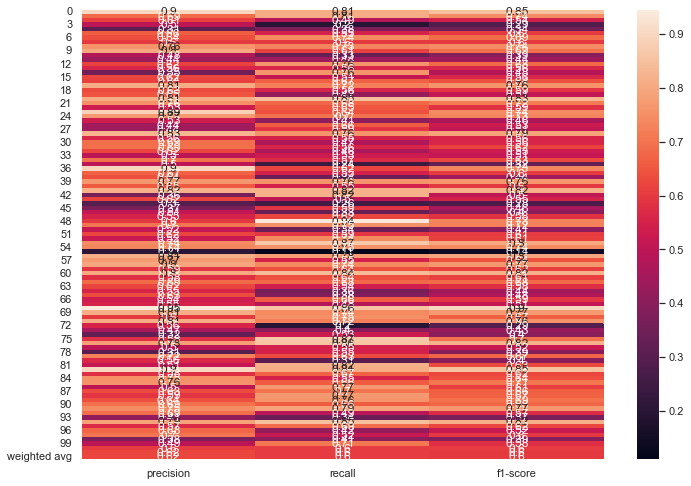

In [26]:
# Since the data size was so large, heat map was used to represent
# the confusion matrix

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)